## Importing libraries

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import squarify
films = pd.read_csv('films_clean.csv')
genres = pd.read_csv('film_genres.csv')
genres_names = pd.read_csv('genres_names.csv')
country_names = pd.read_csv('countries_names.csv')
film_country = pd.read_csv('film_country.csv')

In [42]:
films

,genres,id,original_language,original_title,overview,popularity,production_companies,production_countries,runtime,spoken_languages,title,year,director,director_gender
0,"Comedy, Romance",11860,English,Sabrina,An ugly duckling having undergone a remarkable...,6.677277,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","Germany, United States of America",127.0,2,Sabrina,1995,Sydney Pollack,male
1,"Comedy, Horror",12110,English,Dracula: Dead and Loving It,When a lawyer shows up at the vampire's doorst...,5.430331,"[{'name': 'Columbia Pictures', 'id': 5}, {'nam...","France, United States of America",88.0,2,Dracula: Dead and Loving It,1995,Mel Brooks,male
2,"Action, Adventure",1408,English,Cutthroat Island,"Morgan Adams and her slave, William Shaw, are ...",7.284477,"[{'name': 'Le Studio Canal+', 'id': 183}, {'na...","Germany, France, Italy, United States of America",119.0,2,Cutthroat Island,1995,Renny Harlin,male
3,"Drama, Crime",524,English,Casino,The life of the gambling paradise – Las Vegas ...,10.137389,"[{'name': 'Universal Pictures', 'id': 33}, {'n...","France, United States of America",178.0,1,Casino,1995,Martin Scorsese,male
4,"Drama, Romance",4584,English,Sense and Sensibility,"Rich Mr. Dashwood dies, leaving his second wif...",10.673167,"[{'name': 'Columbia Pictures Corporation', 'id...","United Kingdom, United States of America",136.0,1,Sense and Sensibility,1995,Ang Lee,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9574,"Drama, Thriller, Mystery, Horror",365432,English,The Sublet,The Sublet is a suspense driven psychological ...,1.339355,"[{'name': 'Black Fawn Films', 'id': 9315}, {'n...",Canada,82.0,2,The Sublet,2015,John Ainslie,male
9575,"Action, Thriller, Mystery, Horror",45527,English,The Final Storm,A stranger named Silas flees from a devastatin...,1.270832,[{'name': 'Boll Kino Beteiligungs GmbH & Co. K...,"Germany, Canada",92.0,1,The Final Storm,2010,Uwe Boll,male
9576,"Drama, Family, TVMovie",39562,English,To Be Fat Like Me,"Pretty, popular, and slim high-schooler Aly Sc...",0.767762,[],Canada,89.0,1,To Be Fat Like Me,2007,Douglas Barr,male
9577,Comedy,14008,English,Cadet Kelly,Hyperactive teenager Kelly is enrolled into a ...,4.392389,"[{'name': 'Walt Disney Television', 'id': 670}...","United States of America, Canada",101.0,1,Cadet Kelly,2002,Larry Shaw,male


## Creating Exploitable Dataframes for EDA

In [43]:
#Merging genre name and film id
film_genres = genres.merge(genres_names, on='genre_id')

In [44]:
#Merging country name and country id
film_countries = film_country.merge(country_names, on='country_id')

## Splitting the Dataset 

In [45]:
# Splitting the dataset into male directors and female directors
male_directed = films[films['director_gender'] == 'male']
female_directed = films[films['director_gender'] == 'female']

In [46]:
#Splitting the country dataset on gender in order to conduct EDA
country_female = film_countries[film_countries['director_gender'] == 'female']
country_male = film_countries[film_countries['director_gender'] == 'male']

## Visualizations

## Distribution of Movies per Gender

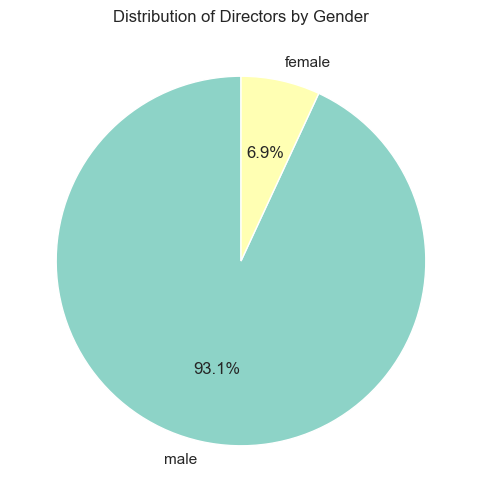

In [47]:
#Pie Chart

sorted_counts = films['director_gender'].value_counts()
labels = sorted_counts.index

plt.figure(figsize=(8, 6))  
colors = sns.color_palette('Set3')  

plt.pie(sorted_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

plt.title('Distribution of Directors by Gender')

plt.show()


## Distribution of Countries

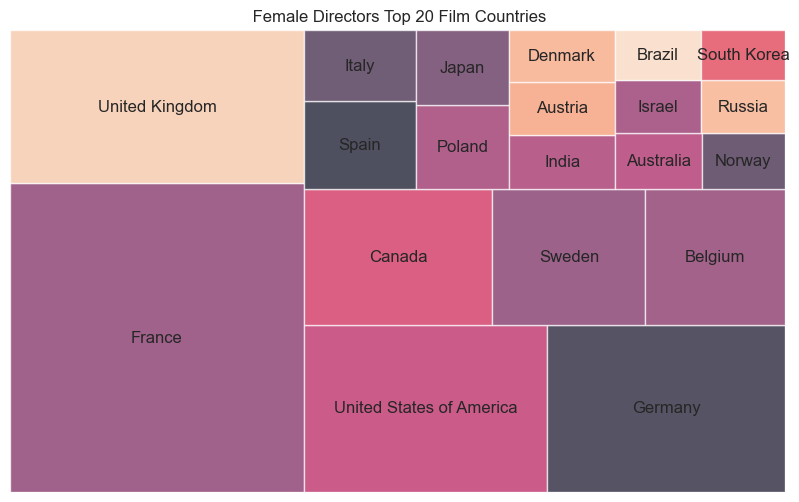

In [48]:
#Treemap plot
#Please note that I did not show the country count because it does not reflect the realities of the dataset 
#because a film can be produced by multiple countries.

top10_genres_both = country_female.groupby('country')['film_id'].sum().sort_values(ascending=False)[:20]

labels = top10_genres_both.index
sizes = top10_genres_both.values

plt.figure(figsize=(10, 6))
squarify.plot(sizes=sizes, label=labels, alpha=0.7)

cmap = sns.color_palette("pastel",len(labels))
sns.set_palette(cmap)

plt.axis('off')
plt.title(' Female Directors Top 20 Film Countries')

plt.show()

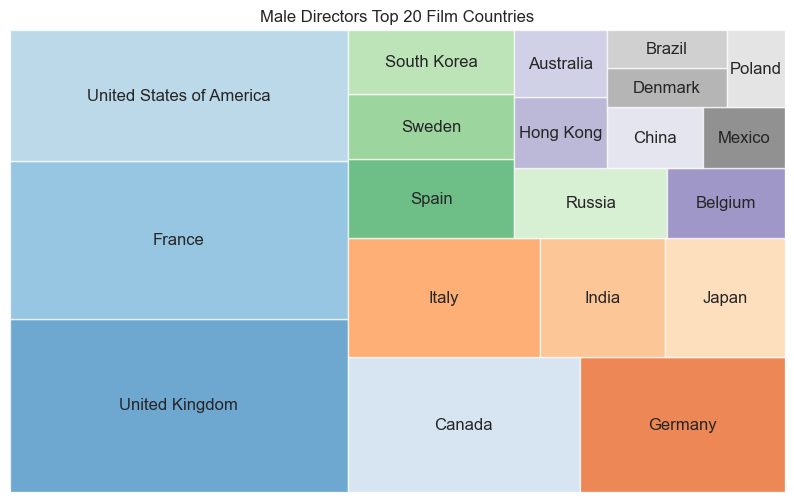

In [49]:
top10_genres_both = country_male.groupby('country')['film_id'].sum().sort_values(ascending=False)[:20]

cmap = plt.cm.tab20c

labels = top10_genres_both.index
sizes = top10_genres_both.values
colors = [cmap(i) for i in range(len(labels))]

plt.figure(figsize=(10, 6))
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=0.7)

plt.axis('off')
plt.title('Male Directors Top 20 Film Countries')

plt.show()

## Distribution of Films per Year 

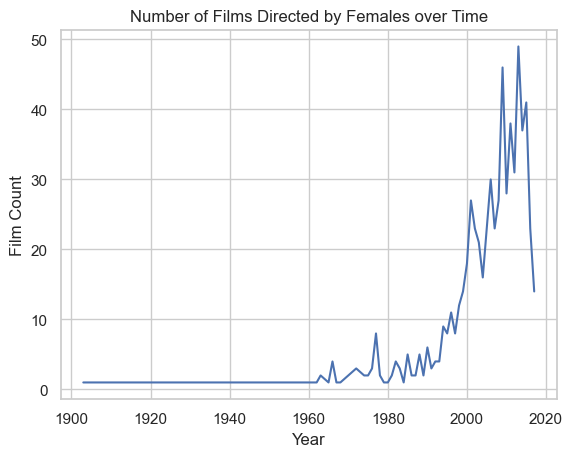

In [50]:
#Line Charts 

film_count = female_directed.groupby('year')['id'].count().reset_index()

sns.lineplot(data=film_count, x='year', y='id', color='b')

plt.xlabel('Year')
plt.ylabel('Film Count')
plt.title('Number of Films Directed by Females over Time')

plt.show()

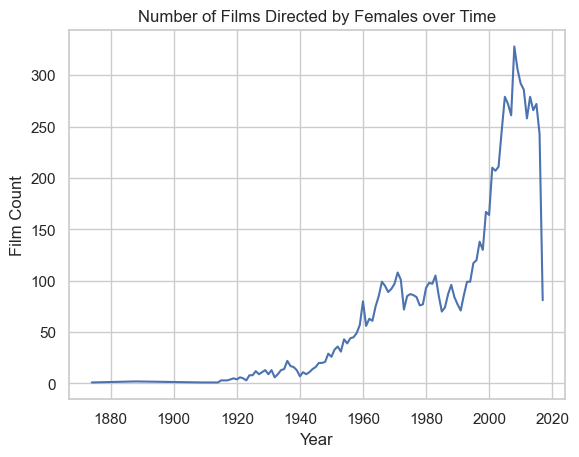

In [51]:
film_count = male_directed.groupby('year')['id'].count().reset_index()

sns.lineplot(data=film_count, x='year', y='id', color='b')

plt.xlabel('Year')
plt.ylabel('Film Count')
plt.title('Number of Films Directed by Females over Time')

plt.show()

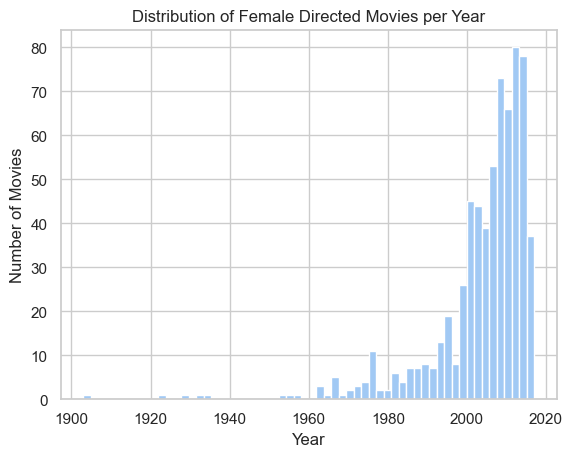

In [52]:
#Histograms

film_count = female_directed.groupby('year')['id'].count()

plt.hist(film_count.index, bins=len(film_count), weights=film_count.values)
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.title('Distribution of Female Directed Movies per Year')
plt.show()

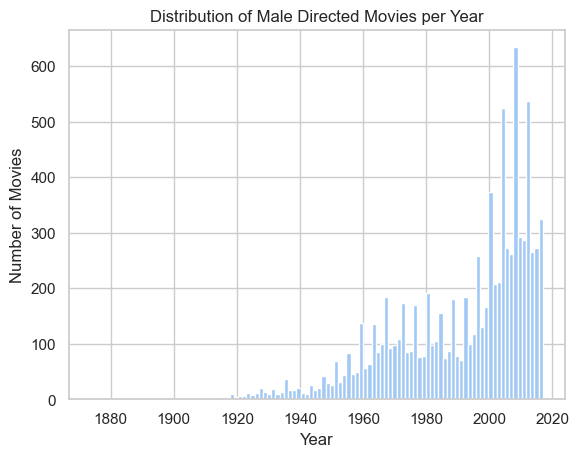

In [53]:
film_count = male_directed.groupby('year')['id'].count()

plt.hist(film_count.index, bins=len(film_count), weights=film_count.values)
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.title('Distribution of Male Directed Movies per Year')
plt.show()

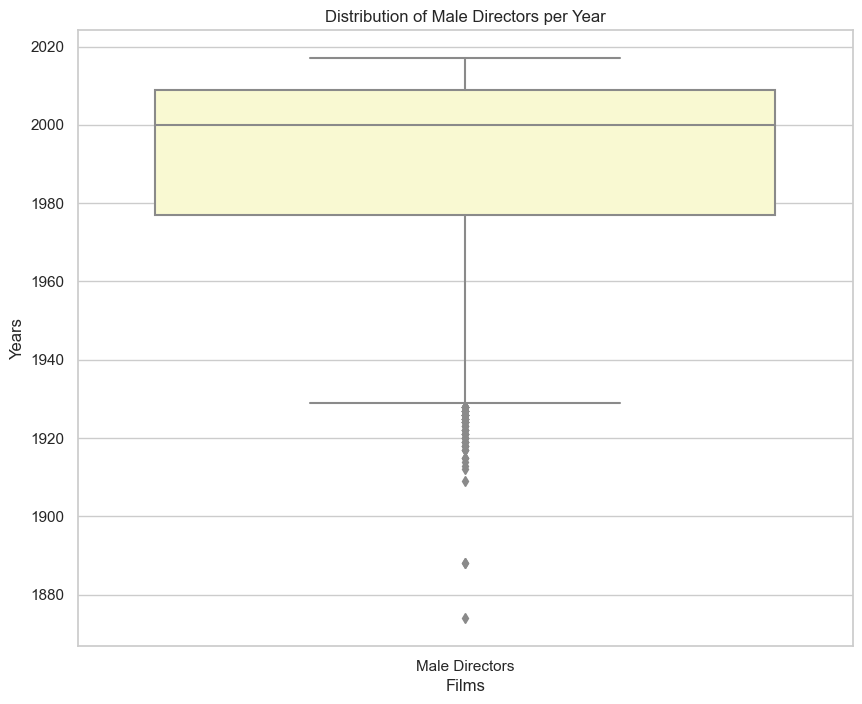

In [58]:
# The boxplot is better suited than the histogram to show the difference in distrbution between female-directed movies and male directed movies
grouped_data = male_directed.groupby('id')['year'].sum()
values = grouped_data.values.tolist()

df = pd.DataFrame({'Films': ['Male Directors'] * len(values),
                   'Year': values})

plt.figure(figsize=(10, 8))
sns.set(style='whitegrid')
ax = sns.boxplot(x='Films', y='Year', data=df, palette=custom_palette)
ax.set_xlabel('Films')
ax.set_ylabel('Years')
ax.set_title('Distribution of Male Directors per Year')

plt.show()



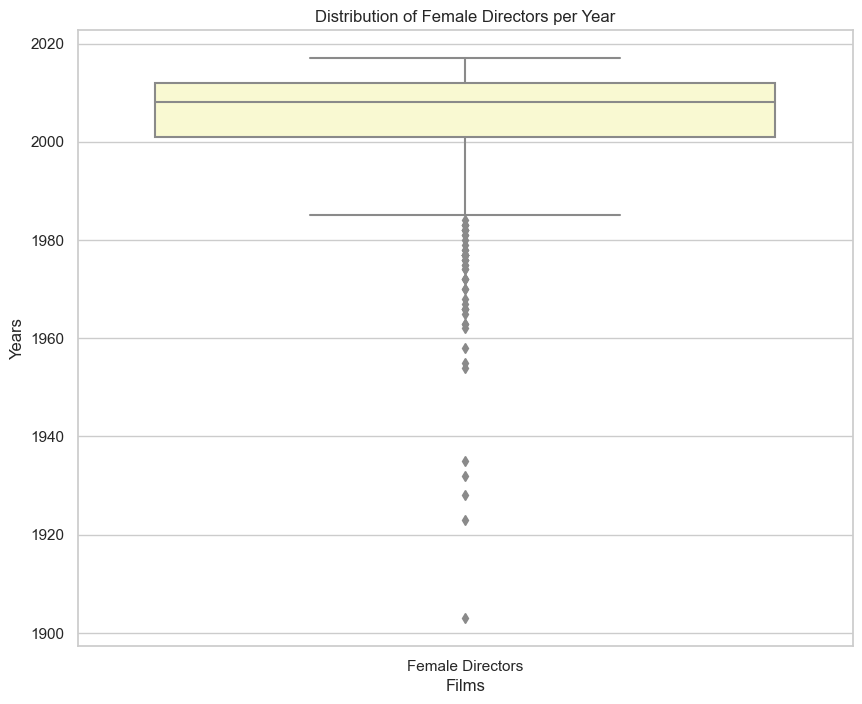

In [57]:
grouped_data = female_directed.groupby('id')['year'].sum()
values = grouped_data.values.tolist()

df = pd.DataFrame({'Films': ['Female Directors'] * len(values),
                   'Year': values})

plt.figure(figsize=(10, 8))
sns.set(style='whitegrid')
custom_palette = ['#FFFFCC']
ax = sns.boxplot(x='Films', y='Year', data=df, palette=custom_palette)
ax.set_xlabel('Films')
ax.set_ylabel('Years')
ax.set_title('Distribution of Female Directors per Year')

plt.show()

## Distribution of Films per Popularity

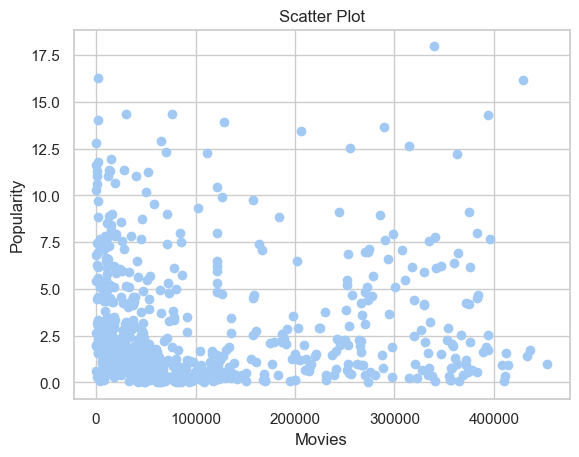

In [55]:
# The scatter plot is not the clearest to portray this correlation

grouped_data = female_directed.groupby('popularity')['id'].sum()
df = grouped_data.reset_index()
plt.scatter(df['id'], df['popularity'])
plt.xlabel('Movies')
plt.ylabel('Popularity')
plt.title('Scatter Plot')
plt.show()

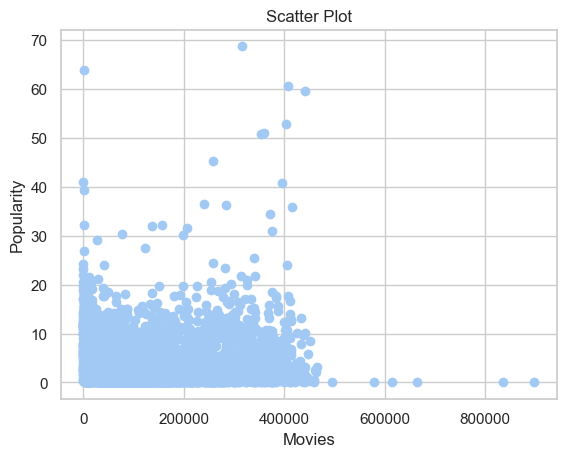

In [56]:

grouped_data = male_directed.groupby('popularity')['id'].sum()
df = grouped_data.reset_index()
plt.scatter(df['id'], df['popularity'])
plt.xlabel('Movies')
plt.ylabel('Popularity')
plt.title('Scatter Plot')
plt.show()

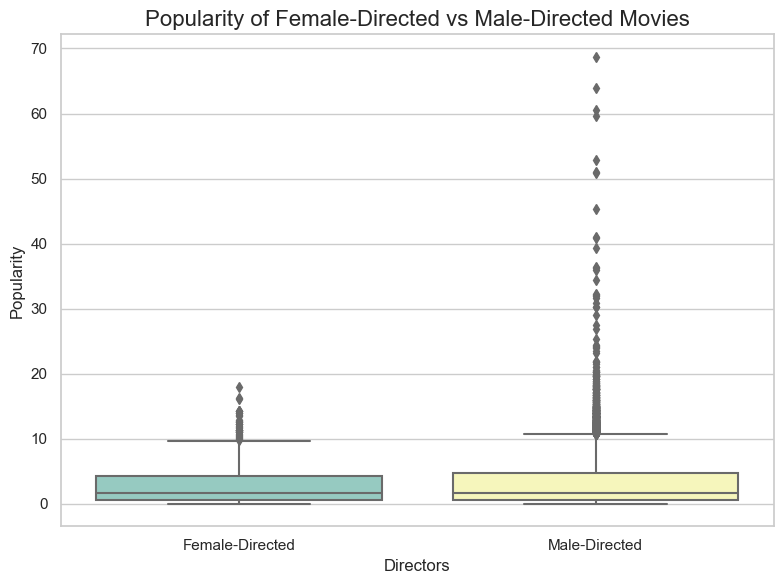

In [59]:
#The Distribution of Films per Popularity of male directors and female directors must be plotted together,
#otherwise they won't be comparable since they have different ranges.

grouped_data_male = male_directed.groupby('id')['popularity'].sum()
grouped_data_female = female_directed.groupby('id')['popularity'].sum()

combined_data = pd.DataFrame({'Female-Directed': grouped_data_female, 'Male-Directed': grouped_data_male})

plt.figure(figsize=(8, 6))
sns.boxplot(data=combined_data, palette="Set3")

plt.title('Popularity of Female-Directed vs Male-Directed Movies', fontsize=16)
plt.xlabel('Directors', fontsize=12)
plt.ylabel('Popularity', fontsize=12)


plt.tight_layout()
plt.show()

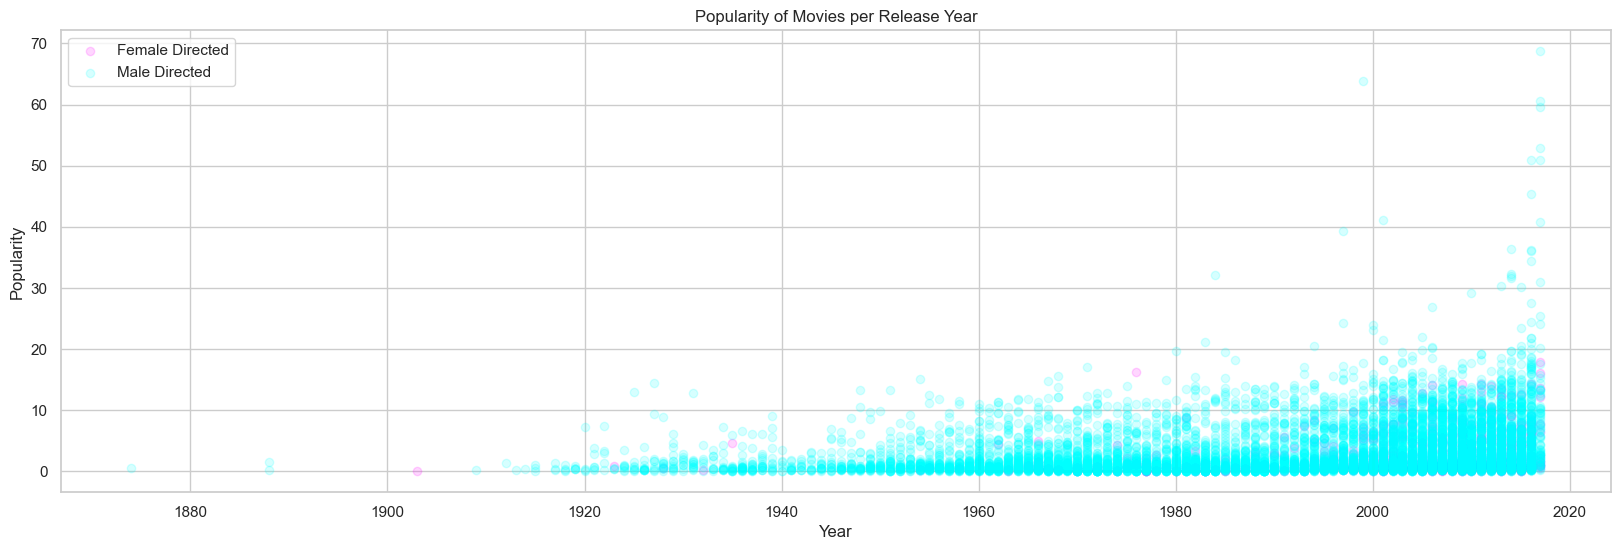

In [61]:
#

plt.figure(figsize=[20,6])

base_color_female = '#FF00FF'  
base_color_male = '#00FFFF'    

plt.scatter(data=female_directed, x='year', y='popularity', alpha=0.16, color=base_color_female, label='Female Directed')
plt.scatter(data=male_directed, x='year', y='popularity', alpha=0.16, color=base_color_male, label='Male Directed')

plt.legend()
plt.xlabel('Year')
plt.ylabel('Popularity')
plt.title('Popularity of Movies per Release Year')

plt.show()

<AxesSubplot:xlabel='year', ylabel='popularity'>

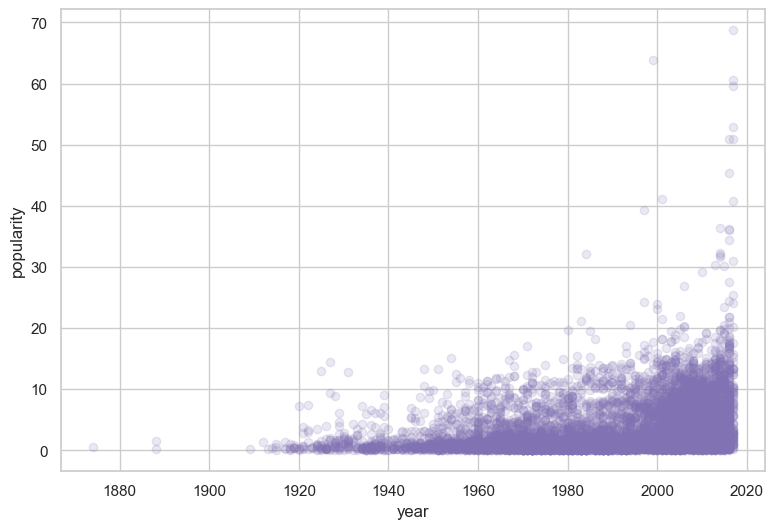

In [62]:
plt.figure(figsize=[20,6])

plt.subplot(1,2,1)
base_color= sns.color_palette()[4]
sns.regplot(data=male_directed, x='year', y='popularity', scatter_kws={'alpha':0.16}, fit_reg=False, color=base_color)

<AxesSubplot:xlabel='id', ylabel='popularity'>

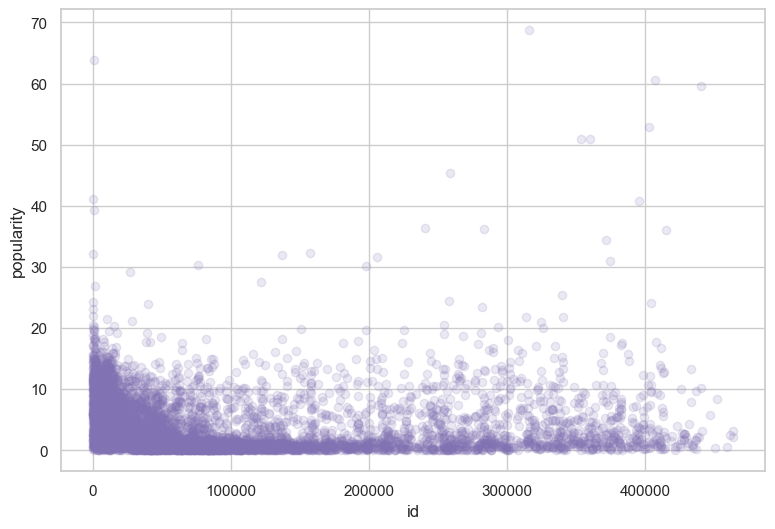

In [63]:
plt.figure(figsize=[20,6])

plt.subplot(1,2,1)
base_color= sns.color_palette()[4]
sns.regplot(data=male_directed, x='id', y='popularity', scatter_kws={'alpha':0.16}, fit_reg=False, color=base_color)

<AxesSubplot:xlabel='id', ylabel='popularity'>

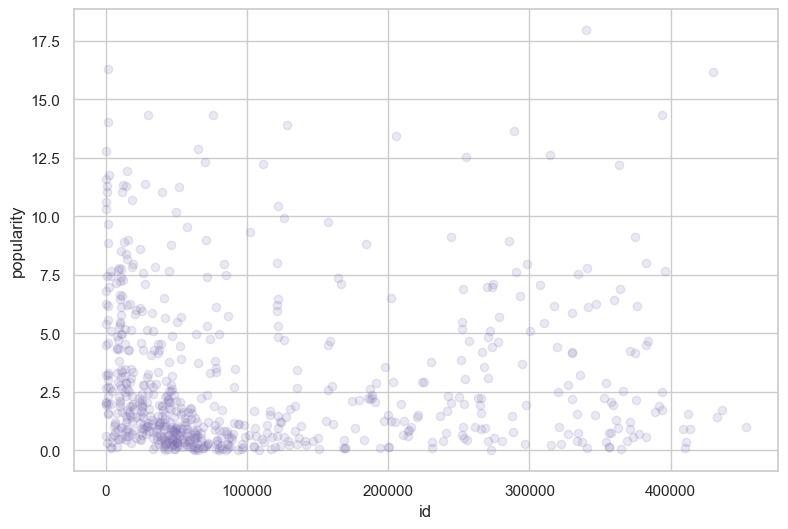

In [64]:
plt.figure(figsize=[20,6])

plt.subplot(1,2,1)
base_color= sns.color_palette()[4]
sns.regplot(data=female_directed, x='id', y='popularity', scatter_kws={'alpha':0.16}, fit_reg=False, color=base_color)

In [65]:
films.dtypes

genres                   object
id                        int64
original_language        object
original_title           object
overview                 object
popularity              float64
production_companies     object
production_countries     object
runtime                 float64
spoken_languages          int64
title                    object
year                      int64
director                 object
director_gender          object
dtype: object

<AxesSubplot:xlabel='runtime', ylabel='popularity'>

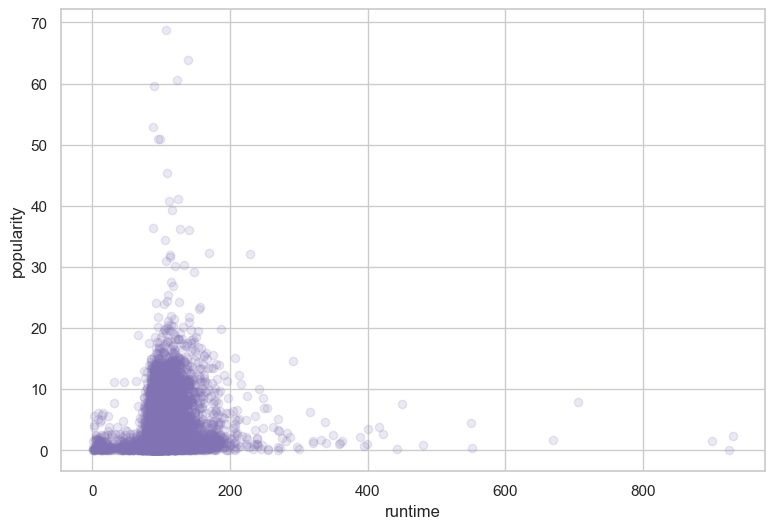

In [66]:
plt.figure(figsize=[20,6])

plt.subplot(1,2,1)
base_color= sns.color_palette()[4]
sns.regplot(data=male_directed, x='runtime', y='popularity', scatter_kws={'alpha':0.16}, fit_reg=False, color=base_color)

Text(0, 0.5, 'Countries')

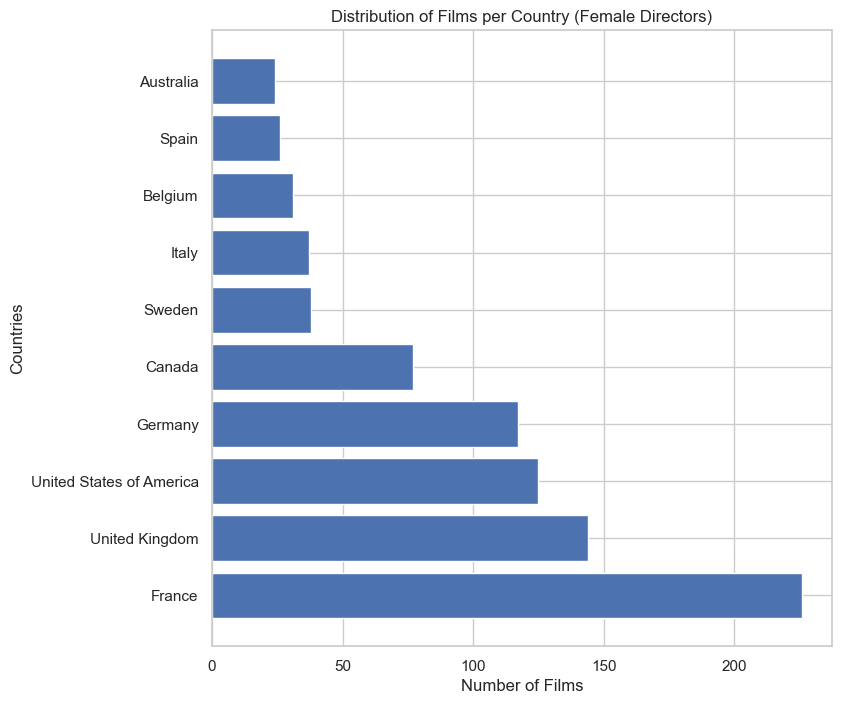

In [67]:
df_country = country_female['country'].value_counts().sort_values(ascending=False)[:10]

plt.figure(figsize=(8,8))
bars = plt.barh(df_country.index, df_country)
plt.title('Distribution of Films per Country (Female Directors)')
plt.xlabel('Number of Films')
plt.ylabel('Countries')


Text(0, 0.5, 'Countries')

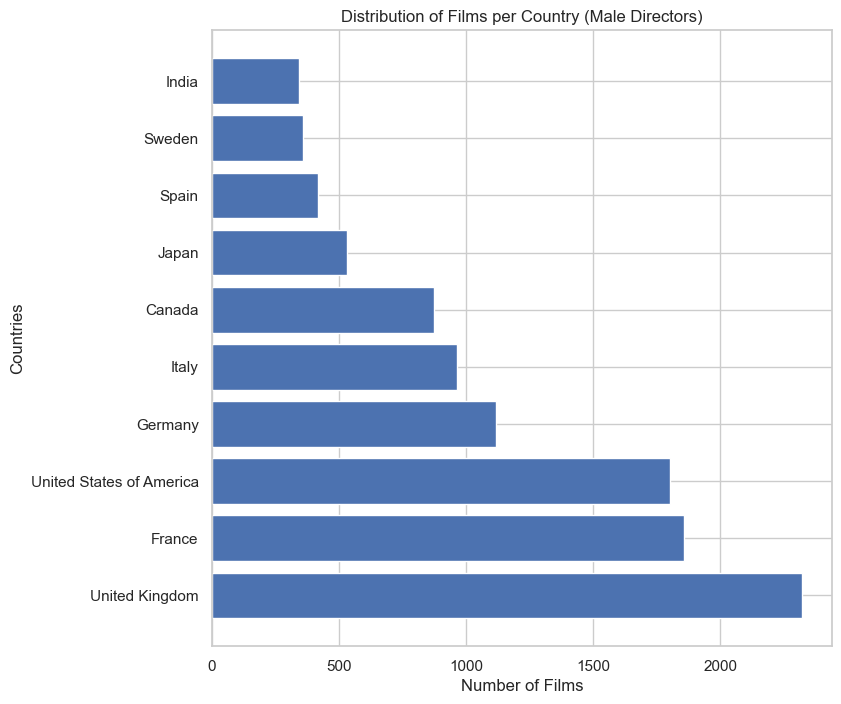

In [69]:
df_country = country_male['country'].value_counts().sort_values(ascending=False)[:10]

plt.figure(figsize=(8,8))
bars = plt.barh(df_country.index, df_country)
plt.title('Distribution of Films per Country (Male Directors)')
plt.xlabel('Number of Films')
plt.ylabel('Countries')
